In [58]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [59]:
vehicles=pd.read_csv('car data.csv')

In [60]:
vehicles.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [61]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [62]:
vehicles.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


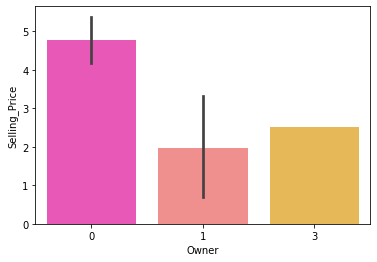

In [63]:
sns.barplot(x='Owner',y='Selling_Price',data=vehicles,palette='spring')

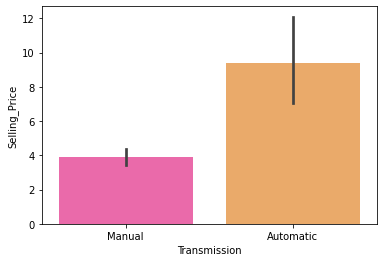

In [64]:
sns.barplot(x='Transmission',y='Selling_Price',data=vehicles,palette='spring')

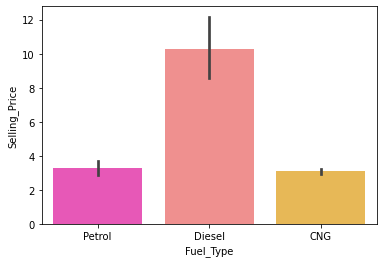

In [65]:
sns.barplot(x='Fuel_Type',y='Selling_Price',data=vehicles,palette='spring')

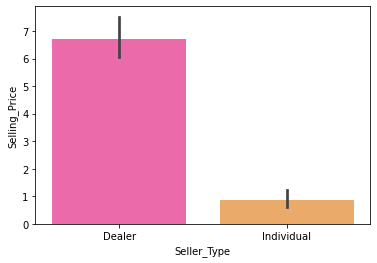

In [66]:
sns.barplot(x='Seller_Type',y='Selling_Price',data=vehicles,palette='spring')

In [67]:
vehicles.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


In [68]:
print(vehicles['Seller_Type'].unique())
print(vehicles['Fuel_Type'].unique())
print(vehicles['Transmission'].unique())
print(vehicles['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


<Figure size 720x720 with 0 Axes>

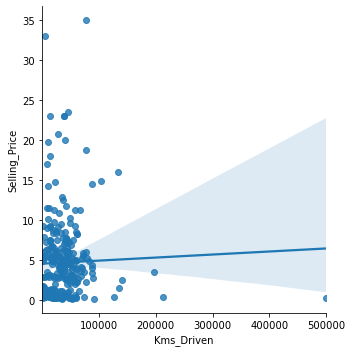

In [69]:
plt.figure(figsize=(10,10))
sns.lmplot(x='Kms_Driven',y='Selling_Price',data=vehicles)

<Figure size 720x720 with 0 Axes>

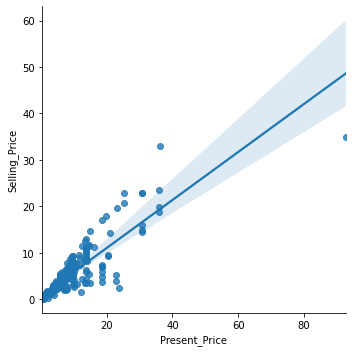

In [70]:
plt.figure(figsize=(10,10))
sns.lmplot(x='Present_Price',y='Selling_Price',data=vehicles)

In [71]:
vehicles['Vehicle_Age']=2020- vehicles['Year']
vehicles.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,2
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0,5
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0,5
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0,4
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0,5


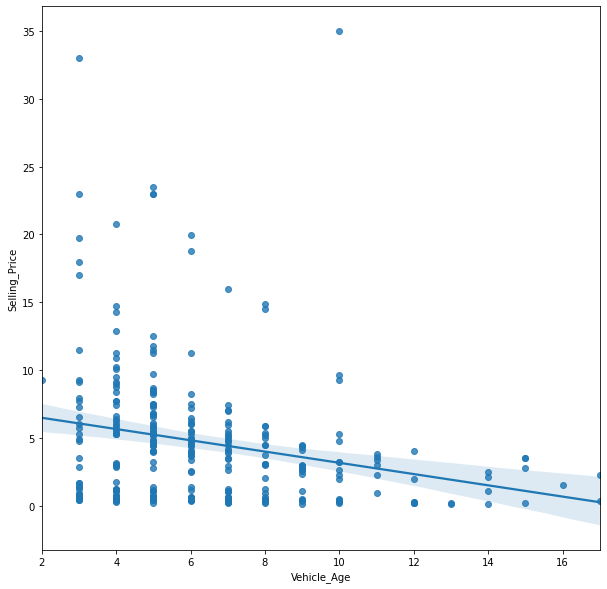

In [72]:
plt.figure(figsize=(10,10))
sns.regplot(x='Vehicle_Age',y='Selling_Price',data=vehicles)

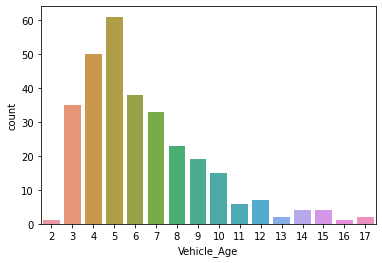

In [73]:
sns.countplot(vehicles['Vehicle_Age'])

In [74]:
vehicles=pd.get_dummies(vehicles,columns=['Fuel_Type','Transmission','Seller_Type'],drop_first=True)

In [75]:
vehicles.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual
0,ritz,2014,3.35,5.59,27000,0,6,0,1,1,0
1,sx4,2013,4.75,9.54,43000,0,7,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,0,3,0,1,1,0
3,wagon r,2011,2.85,4.15,5200,0,9,0,1,1,0
4,swift,2014,4.60,6.87,42450,0,6,1,0,1,0


In [77]:
vehicles.drop(columns=['Year'],inplace=True)

In [78]:
vehicles.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual
0,ritz,3.35,5.59,27000,0,6,0,1,1,0
1,sx4,4.75,9.54,43000,0,7,1,0,1,0
2,ciaz,7.25,9.85,6900,0,3,0,1,1,0
3,wagon r,2.85,4.15,5200,0,9,0,1,1,0
4,swift,4.60,6.87,42450,0,6,1,0,1,0


In [79]:
vehicles.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.367128,-0.550724
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.348715,-0.512030
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.162510,-0.101419
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,-0.050316,0.124269
Vehicle_Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,-0.000394,0.039896
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.098643,-0.350467
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.091013,0.358321
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,1.000000,0.063240
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,0.063240,1.000000


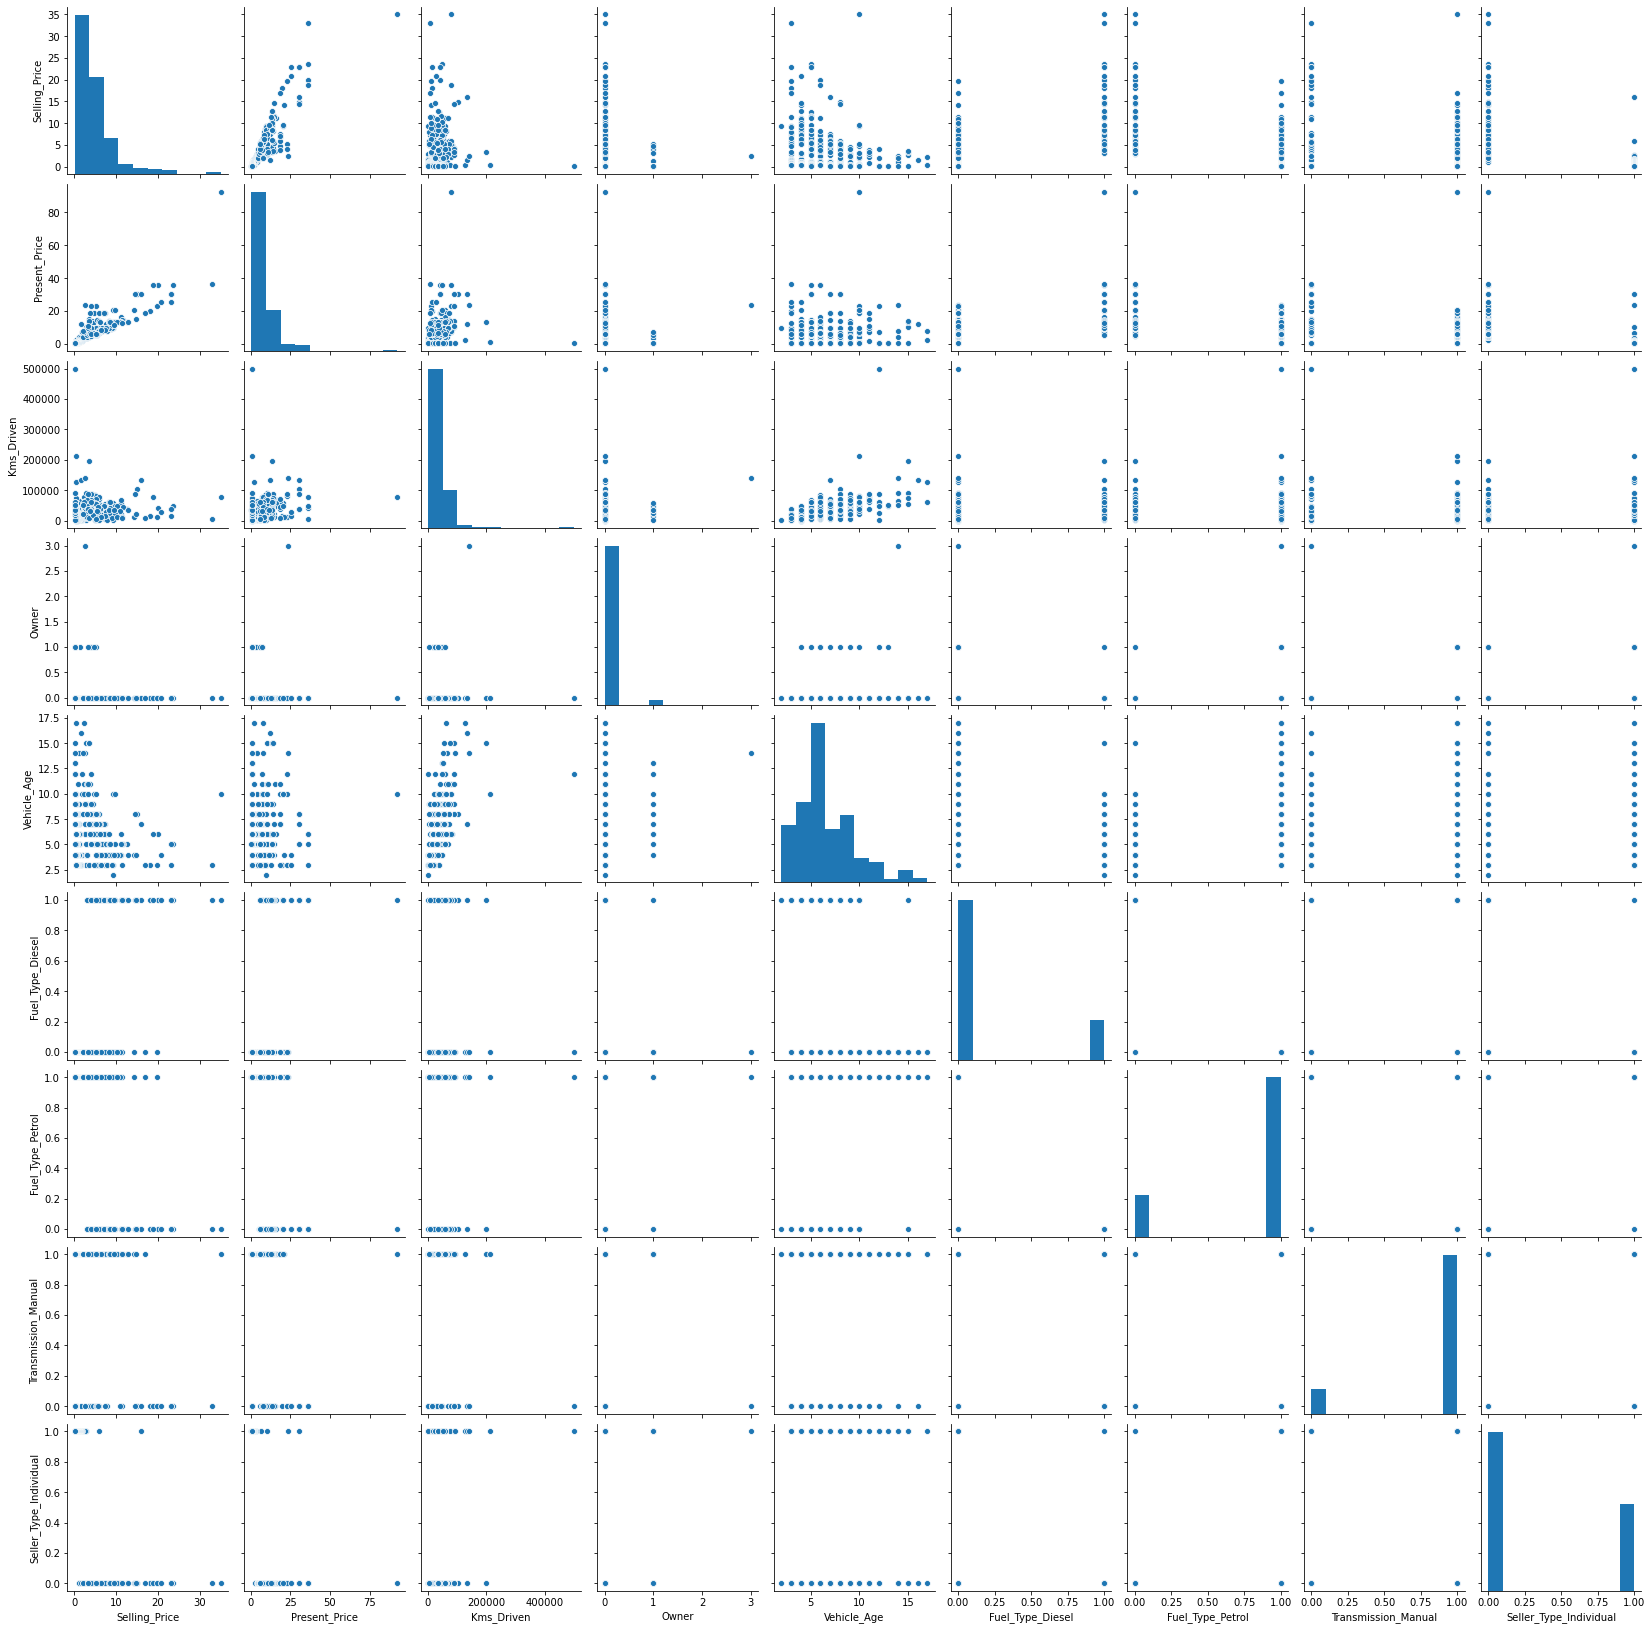

In [80]:
sns.pairplot(vehicles)

In [81]:
correlations = vehicles.corr()

In [82]:
correlations

,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.367128,-0.550724
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.348715,-0.512030
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.162510,-0.101419
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,-0.050316,0.124269
Vehicle_Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,-0.000394,0.039896
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.098643,-0.350467
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.091013,0.358321
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,1.000000,0.063240
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,0.063240,1.000000


In [83]:
indx=correlations.index

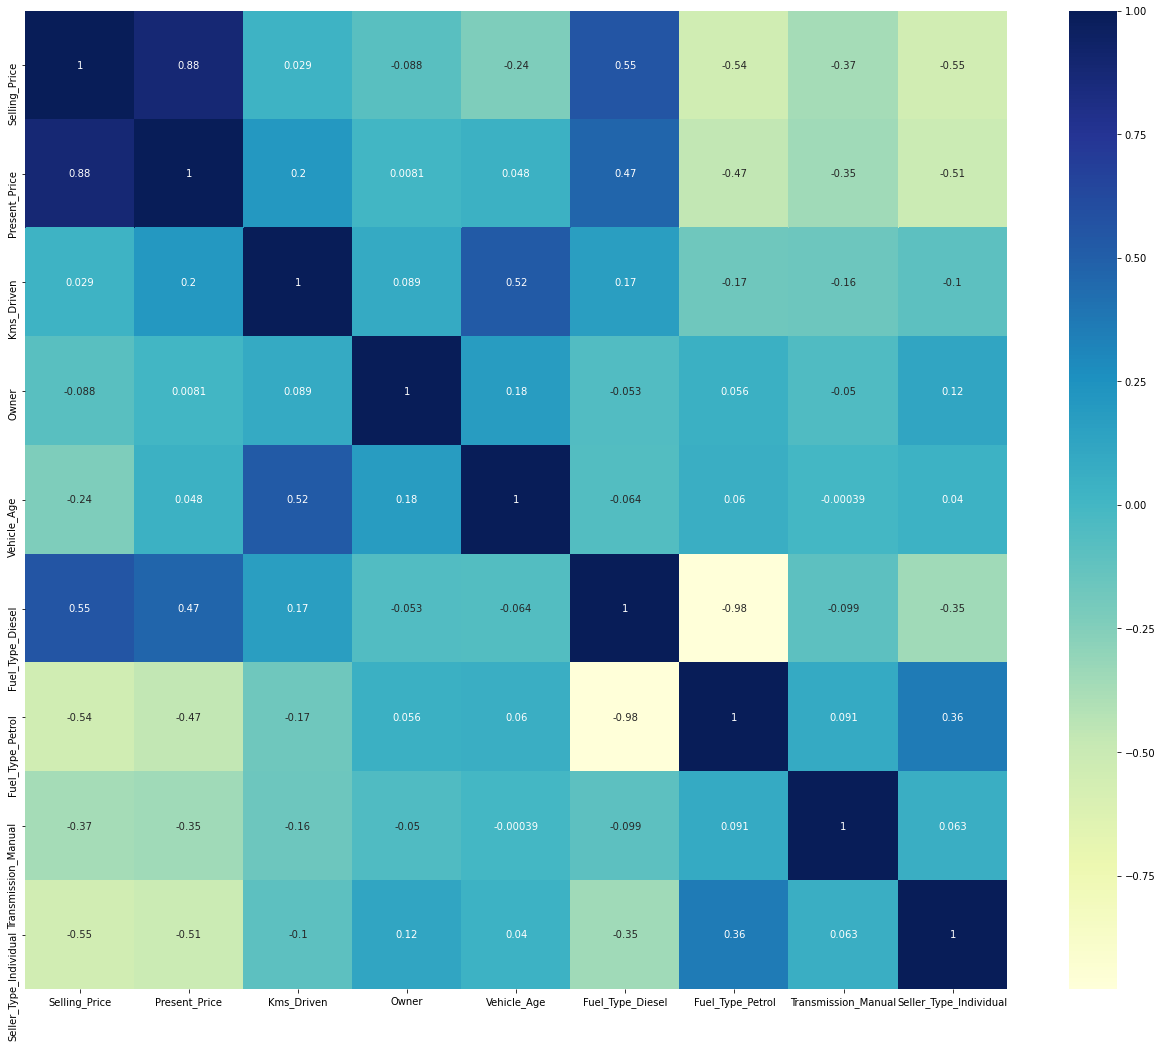

In [84]:
plt.figure(figsize=(22,18))
sns.heatmap(vehicles[indx].corr(),annot=True,cmap="YlGnBu")


In [85]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
var=['Selling_Price','Present_Price','Kms_Driven','Vehicle_Age']

In [86]:
np.random.seed(0)
vehicles_train,vehicles_test = train_test_split(vehicles, test_size=0.3, random_state=100)
vehicles_train[var]=scaler.fit_transform(vehicles_train[var])
vehicles_test[var]=scaler.transform(vehicles_test[var])
X_test=vehicles_test.drop(columns=['Car_Name','Selling_Price'],axis=1)
y_test=vehicles_test['Selling_Price']
X_train=vehicles_train.drop(columns=['Car_Name','Selling_Price'],axis=1)
y_train=vehicles_train['Selling_Price']

In [87]:
lm=LinearRegression()

In [88]:
lm.fit(X_train,y_train)

LinearRegression()

In [89]:
predictions=lm.predict(X_test)

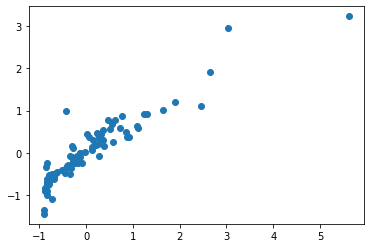

In [90]:
plt.scatter(y_test,predictions)

In [91]:
MAE=metrics.mean_absolute_error(y_test,predictions)
MSE=metrics.mean_squared_error(y_test,predictions)
RMSE=np.sqrt(MSE)
print(MAE)
print(MSE)
print(RMSE)

0.25222788593717343
0.17152491124206032
0.4141556606423004


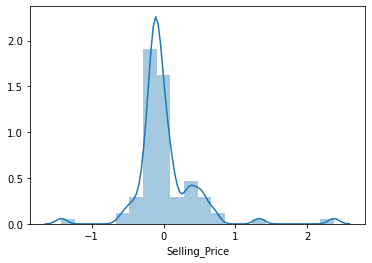

In [92]:
sns.distplot((y_test-predictions),bins=20)

In [93]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,predictions)
R2

0.8316982715837705